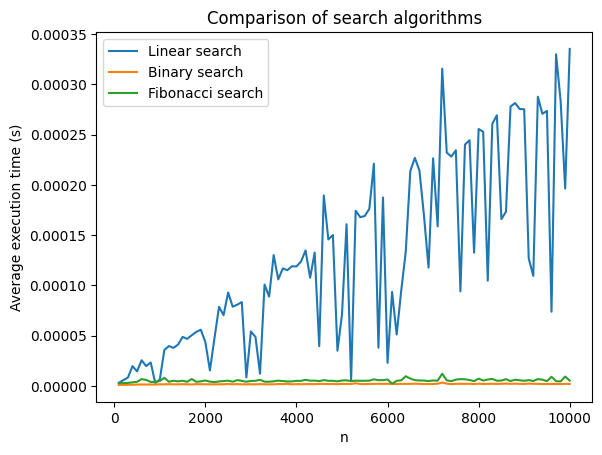

In [10]:
import random
import timeit
import matplotlib.pyplot as plt

# Linear Search
def linearSearch(arr, x):
 
    for i in range(len(arr)):
        if (arr[i] == x):
            return i
    return -1

# Binary Search
def binarySearch(arr, x):
    low = 0
    high = len(arr) - 1    

    while low <= high:
 
        mid = (low + high) // 2
 
        if arr[mid] == x:
            return mid
 
        elif arr[mid] < x:
            low = mid + 1
 
        else:
            high = mid - 1
 
    return -1

# Fibonacci Search
def fibonacciSearch(arr, x):
 
    # Initialize fibonacci numbers
    fib2 = 0  # 第 (n-2) 個 Fibonacci 數
    fib1 = 1  # 第 (n-1) 個 Fibonacci 數
    fib = fib2 + fib1  # 第 n 個 Fibonacci 數
 
    # fib is going to store the smallest
    # Fibonacci Number greater than or equal to n
    while (fib < len(arr)):
        fib2 = fib1
        fib1 = fib
        fib = fib2 + fib1
 
    # Marks the eliminated range from front
    offset = -1
 
    # while there are elements to be inspected.
    # Note that we compare arr[fib2] with x.
    # When fib becomes 1, fib2 becomes 0
    while (fib > 1):
 
        # Check if fib2 is a valid location
        i = min(offset + fib2, len(arr) - 1)
 
        # If x is greater than the value at
        # index fib2, cut the subarray array
        # from offset to i
        if (arr[i] < x):
            fib = fib1
            fib1 = fib2
            fib2 = fib - fib1
            offset = i
 
        # If x is less than the value at
        # index fib2, cut the subarray
        # after i+1
        elif (arr[i] > x):
            fib = fib2
            fib1 = fib1 - fib2
            fib2 = fib - fib1
 
        # 找到該元素，return i
        else:
            return i
 
    # comparing the last element with x */
    if(fib1 and arr[len(arr) - 1] == x):
        return len(arr) - 1
 
    # 找不到該元素，return -1
    return -1

# Initialize variables
n_values = range(100, 10001, 100)
linear_times = []
binary_times = []
fibonacci_times = []

# Loop over different n values
for n in n_values:

    # Initialize list S with random integers
    S = [random.randint(1, 10000) for _ in range(n)]

    # 選擇 integer x
    x = random.randint(1, 10000)

    # 執行各種演算法5次，並計算平均執行時間
    linear_time = timeit.timeit(lambda: linearSearch(S, x), number = 5) / 5
    binary_time = timeit.timeit(lambda: binarySearch(S, x), number = 5) / 5
    fibonacci_time = timeit.timeit(lambda: fibonacciSearch(S, x), number = 5) / 5

    # 將每一次的平均執行時間 Append 到 lists 中
    linear_times.append(linear_time)
    binary_times.append(binary_time)
    fibonacci_times.append(fibonacci_time)

# 製作折線圖
plt.plot(n_values, linear_times, label='Linear search')
plt.plot(n_values, binary_times, label='Binary search')
plt.plot(n_values, fibonacci_times, label='Fibonacci search')
plt.xlabel('n')
plt.ylabel('Average execution time (s)')
plt.title('Comparison of search algorithms')
plt.legend()
plt.show()